In [27]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering the data

In [28]:
#Extracting data from twitter archive
df=pd.read_csv('twitter-archive-enhanced.csv')
#Extracting data from tsv file
df2 = pd.read_csv("image-predictions.tsv",sep='\t')


In [29]:
#Converting data from tweepy to a data frame
df3 = pd.DataFrame(columns=['tweet_id', 'retweet_account', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df3 = df3.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                            columns=['tweet_id', 'retweet_count', 'favorite_count']))

df3 = df3.reset_index(drop=True)


# Assessing Data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2326 non-null   object 
 1   retweet_account  0 non-null      object 
 2   favorite_count   2326 non-null   object 
 3   retweet_count    2326 non-null   float64
dtypes: float64(1), object(3)
memory usage: 72.8+ KB


In [33]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [34]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
df3.head()

,tweet_id,retweet_account,favorite_count,retweet_count
0,892420643555336193,NaN,34607,7213.0
1,892177421306343426,NaN,29997,5409.0
2,891815181378084864,NaN,22584,3575.0
3,891689557279858688,NaN,37873,7433.0
4,891327558926688256,NaN,36158,7976.0


# Cleaning Data

Define: Remove retweets column as not relevant to the project

Code:

In [36]:
df3= df3.drop('retweet_account', axis=1)

Test: 

In [37]:
df3.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34607,7213.0
1,892177421306343426,29997,5409.0
2,891815181378084864,22584,3575.0
3,891689557279858688,37873,7433.0
4,891327558926688256,36158,7976.0


Define: tweet_id should be changed from string to numeric data type, so we can merge on tweet_id

Code:

In [38]:

df3['tweet_id']=pd.to_numeric(df3["tweet_id"])

Test: 

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2326 non-null   int64  
 1   favorite_count  2326 non-null   object 
 2   retweet_count   2326 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 54.6+ KB


#Define: Merging all three data files into a combined file

Code:

In [40]:

df = pd.merge(df, df3, how="outer", on=["tweet_id"])
df = pd.merge(df, df2, how="outer", on=["tweet_id"])

Test:

In [41]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Define: drop in_reply_to_user_id, in_reply_to_status_id as all values are null, and retweet columns as we dont want to look at retweets

Code

In [42]:
df=df.drop('in_reply_to_user_id', axis=1)
df=df.drop('in_reply_to_status_id', axis=1)
df=df[~df.retweeted_status_id.notnull()]
df=df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

Test

In [43]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#Define: extracting the numerator from the ratings. Convert rating_numerator to a float so we can compare to the new extracted numerator values to find discrepancies


Code

In [44]:
df['Numerator']=df.text.str.extract('(\d+[\.]?[\d+]*/)')
df['Numerator']=df['Numerator'].str[0:-1].astype(float)
df["rating_numerator"] = df["rating_numerator"].astype(float)

Test: to find any discrepancies. Reveals all decimal numbers were wrongly extracted in rating_numerator


In [45]:
df[df.Numerator!=df.rating_numerator]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Numerator
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10,Bella,None,None,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,13.50
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,None,None,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,9.75
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,None,None,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,11.27
1689,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,5.0,10,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.50
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10,None,None,None,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,11.26


Define: extracting the Denominator from the ratings, #convert str to int


Code:


In [46]:
df['Denominator']=df.text.str.extract('/([0-9]+)')
df["Denominator"] = pd.to_numeric(df["Denominator"])

Test

In [47]:
df[df.Denominator!=df.rating_denominator]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Numerator,Denominator


Define: convert timestamp to datetime datatype


Code:

In [48]:
pd.to_datetime(df.timestamp)

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2175, dtype: datetime64[ns, UTC]

Test:

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   float64
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   doggo               2175 non-null   object 
 9   floofer             2175 non-null   object 
 10  pupper              2175 non-null   object 
 11  puppo               2175 non-null   object 
 12  favorite_count      2166 non-null   object 
 13  retweet_count       2166 non-null   float64
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   float64
 16  p1    

#Define: Extract doggo, puppo, pupper, blep, snoot, floof and then change to lowercase for consistency

#Code:

In [50]:
df['Doggo']=df.text.str.extract('(doggo)(?i)')

In [51]:
df['Puppo']=df.text.str.extract('(puppo)(?i)')

In [52]:
df['Pupper']=df.text.str.extract('(pupper)(?i)')

In [53]:
df['Blep']=df.text.str.extract('(blep)(?i)')

In [54]:
df['Snoot']=df.text.str.extract('(snoot)(?i)')

In [55]:
df['Floof']=df.text.str.extract('(floof)(?i)')

In [56]:
df['Doggo']=df.Doggo.str.lower()

In [57]:
df['Puppo']=df.Puppo.str.lower()

In [58]:
df['Pupper']=df.Pupper.str.lower()

In [59]:
df['Blep']=df.Blep.str.lower()

In [60]:
df['Snoot']=df.Snoot.str.lower()

In [61]:
df['Floof']=df.Floof.str.lower()

We will compare the new doggo,floofer,pupper,puppo columns with the one in the data to see which ones were not extracted. We will have to replace None and NaN with "", so we can compare all cells. We see that data that did not match were the ones with capital letters in the word. We were able to extract those in the new columns. 

In [62]:
df['doggo'].replace(to_replace="None", value="", inplace=True)

In [63]:
df['floofer'].replace(to_replace="None", value="", inplace=True)

In [64]:
df['pupper'].replace(to_replace="None", value="", inplace=True)

In [65]:
df['puppo'].replace(to_replace="None", value="", inplace=True)

In [66]:
df['Doggo'].replace(to_replace=np.NaN, value="", inplace=True)

In [67]:
df['Floof'].replace(to_replace=np.NaN, value="", inplace=True)

In [68]:
df['Pupper'].replace(to_replace=np.NaN, value="", inplace=True)

In [69]:
df['Puppo'].replace(to_replace=np.NaN, value="", inplace=True)

#Define: drop the old doggo, puppo, pupper, blep, snoot, rating_numerator, rating_denominator  columns


Code:

In [70]:
df=df.drop(['doggo', 'floofer', 'pupper', 'puppo','rating_numerator', 'rating_denominator'], axis = 1)

Test:

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2175 non-null   int64  
 1   timestamp       2175 non-null   object 
 2   source          2175 non-null   object 
 3   text            2175 non-null   object 
 4   expanded_urls   2117 non-null   object 
 5   name            2175 non-null   object 
 6   favorite_count  2166 non-null   object 
 7   retweet_count   2166 non-null   float64
 8   jpg_url         1994 non-null   object 
 9   img_num         1994 non-null   float64
 10  p1              1994 non-null   object 
 11  p1_conf         1994 non-null   float64
 12  p1_dog          1994 non-null   object 
 13  p2              1994 non-null   object 
 14  p2_conf         1994 non-null   float64
 15  p2_dog          1994 non-null   object 
 16  p3              1994 non-null   object 
 17  p3_conf         1994 non-null   f

#Define:extract the source name from source column and drop the old columns


Code:

In [72]:
df[['s1','Source_name','s3']]=df.source.apply(lambda x: pd.Series(str(x).split(">")))
df.Source_name=df.Source_name.str[:-3]
df=df.drop(['s1','s3','source','expanded_urls'],axis=1)


Test:

In [73]:
df.head()

,tweet_id,timestamp,text,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,...,p3_dog,Numerator,Denominator,Doggo,Puppo,Pupper,Blep,Snoot,Floof,Source_name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,34607,7213.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,...,False,13.0,10,,,,NaN,NaN,,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,29997,5409.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,True,13.0,10,,,,NaN,NaN,,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,22584,3575.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,...,True,12.0,10,,,,NaN,NaN,,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,37873,7433.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,...,False,13.0,10,,,,NaN,NaN,,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,36158,7976.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,...,True,12.0,10,,,,NaN,NaN,,Twitter for iPhone


#Define: Forming a Dog column with name of the dog with the most probability that it is also True


#Code: change the cell to NaN if the p1_dog, p2_dog, p3_dog is False


In [74]:
for i in df.p1.index:
    if df.p1_dog[i]==False:
        df.p1[i]=np.NaN
for i in df.p2.index:
    if df.p2_dog[i]==False:
        df.p2[i]=np.NaN   
for i in df.p3.index:
    if df.p3_dog[i]==False:
        df.p3[i]=np.NaN

<ipython-input-74-7bedf30e7a0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.p1[i]=np.NaN
<ipython-input-74-7bedf30e7a0a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.p2[i]=np.NaN
<ipython-input-74-7bedf30e7a0a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.p3[i]=np.NaN


Test:

In [75]:
df.head()

,tweet_id,timestamp,text,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,...,p3_dog,Numerator,Denominator,Doggo,Puppo,Pupper,Blep,Snoot,Floof,Source_name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,34607,7213.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.097049,...,False,13.0,10,,,,NaN,NaN,,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,29997,5409.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,True,13.0,10,,,,NaN,NaN,,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,22584,3575.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,...,True,12.0,10,,,,NaN,NaN,,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,37873,7433.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,NaN,0.170278,...,False,13.0,10,,,,NaN,NaN,,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,36158,7976.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,...,True,12.0,10,,,,NaN,NaN,,Twitter for iPhone


Define: If the p1, p2, or p3 values are null then dog name will be one which is not null

Code:

In [76]:
df['Dog']=""

In [77]:
for i in df.index:
    if df.p1[i]!=np.NaN:
        df.Dog[i]=df.p1[i]
    elif df.p2[i]!=np.NaN:
        df.Dog[i]=df.p2[i]
    elif df.p3[i]!=np.NaN:
        df.Dog[i]=df.p3[i]
    else:
        df.Dog[i]=np.NaN
    

<ipython-input-77-0f0563d3e1dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dog[i]=df.p1[i]


In [78]:
df.Dog=df.Dog.str.capitalize()

Test:

In [79]:
df.head()

,tweet_id,timestamp,text,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,...,Numerator,Denominator,Doggo,Puppo,Pupper,Blep,Snoot,Floof,Source_name,Dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,34607,7213.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.097049,...,13.0,10,,,,NaN,NaN,,Twitter for iPhone,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,29997,5409.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,13.0,10,,,,NaN,NaN,,Twitter for iPhone,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,22584,3575.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,...,12.0,10,,,,NaN,NaN,,Twitter for iPhone,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,37873,7433.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,NaN,0.170278,...,13.0,10,,,,NaN,NaN,,Twitter for iPhone,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,36158,7976.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,...,12.0,10,,,,NaN,NaN,,Twitter for iPhone,Basset


Define: Transfer all clean files to csv file twitter_archive_master

#Code:


In [80]:
df.to_csv("twitter_archive_master.csv")


# Question: Which are the sources of the most tweets?

In [81]:
df.groupby('Source_name').tweet_id.count().sort_values(ascending=False)

Source_name
Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: tweet_id, dtype: int64

This shows that Twitter for iPhone was the source with most tweets

<ipython-input-82-647ba6a4b950>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Sources of Tweets')

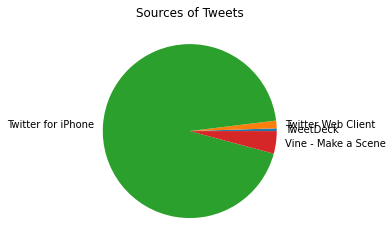

In [82]:
df.groupby('Source_name').tweet_id.count().plot(kind="pie")
ax = plt.axes()
plt.ylabel("")
plt.title('Sources of Tweets')


# Question: Which tweets had the max rating?

In [91]:
df.nlargest(10, 'Numerator', keep='all')

,tweet_id,timestamp,text,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,...,Numerator,Denominator,Doggo,Puppo,Pupper,Blep,Snoot,Floof,Source_name,Dog
979,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,Atticus,4894.0,2339.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,NaN,0.533941,...,1776.0,10,,,,NaN,NaN,,TweetDeck,NaN
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,None,2023.0,67.0,NaN,NaN,NaN,NaN,...,960.0,0,,,,NaN,NaN,,Twitter for iPhone,NaN
189,855860136149123072,2017-04-22 19:05:32 +0000,@s8n You tried very hard to portray this good ...,None,4541.0,876.0,NaN,NaN,NaN,NaN,...,666.0,10,,,,NaN,NaN,,Twitter for iPhone,NaN
188,855862651834028034,2017-04-22 19:15:32 +0000,@dhmontgomery We also gave snoop dogg a 420/10...,None,311.0,22.0,NaN,NaN,NaN,NaN,...,420.0,10,,,,NaN,NaN,,Twitter for iPhone,NaN
2074,670842764863651840,2015-11-29 05:52:33 +0000,After so many requests... here you go.\n\nGood...,None,22665.0,7816.0,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,NaN,0.096063,...,420.0,10,,,,NaN,NaN,,Twitter for iPhone,NaN
1120,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,this,3628.0,1183.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,NaN,0.501767,...,204.0,170,doggo,,,NaN,NaN,,Twitter for iPhone,NaN
290,838150277551247360,2017-03-04 22:12:52 +0000,@markhoppus 182/10,None,1596.0,313.0,NaN,NaN,NaN,NaN,...,182.0,10,,,,NaN,NaN,,Twitter for iPhone,NaN
902,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,None,4605.0,2097.0,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1.0,Labrador_retriever,0.436377,...,165.0,150,,,,NaN,NaN,,Twitter for iPhone,Labrador_retriever
1779,677716515794329600,2015-12-18 05:06:23 +0000,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,None,2860.0,903.0,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1.0,NaN,0.662908,...,144.0,120,,,pupper,NaN,NaN,,Twitter for iPhone,NaN
1634,684225744407494656,2016-01-05 04:11:44 +0000,"Two sneaky puppers were not initially seen, mo...",None,1181.0,192.0,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2.0,golden_retriever,0.203249,...,143.0,130,,,pupper,NaN,NaN,,Twitter for iPhone,Golden_retriever


This shows the top 10 records with the most ratings

# Question:Which listings have the 5 largest favorite counts?

In [84]:
df.favorite_count=pd.to_numeric(df.favorite_count)
df.nlargest(5,'favorite_count')

,tweet_id,timestamp,text,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,...,Numerator,Denominator,Doggo,Puppo,Pupper,Blep,Snoot,Floof,Source_name,Dog
1039,744234799360020481,2016-06-18 18:26:18 +0000,Here's a doggo realizing you can stand in a po...,None,148541.0,72963.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333,...,13.0,10,doggo,,,NaN,NaN,,Twitter for iPhone,Labrador_retriever
413,822872901745569793,2017-01-21 18:26:02 +0000,Here's a super supportive puppo participating ...,None,127178.0,41182.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,0.196015,...,13.0,10,,puppo,,NaN,NaN,,Twitter for iPhone,Lakeland_terrier
534,807106840509214720,2016-12-09 06:17:20 +0000,This is Stephan. He just wants to help. 13/10 ...,Stephan,114732.0,53270.0,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,Chihuahua,0.505370,...,13.0,10,,,,NaN,NaN,,Twitter for iPhone,Chihuahua
135,866450705531457537,2017-05-22 00:28:40 +0000,This is Jamesy. He gives a kiss to every other...,Jamesy,111507.0,31125.0,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,French_bulldog,0.905334,...,13.0,10,,,pupper,NaN,NaN,,Twitter for iPhone,French_bulldog
1079,739238157791694849,2016-06-04 23:31:25 +0000,Here's a doggo blowing bubbles. It's downright...,None,109981.0,54463.0,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1.0,Eskimo_dog,0.503372,...,13.0,10,doggo,,,NaN,NaN,,Twitter for iPhone,Eskimo_dog


The above results show the Dogs with the 5 largest favorite counts

<ipython-input-85-3c4d4c8f9ef3>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0, 'Labrador_retriever'),
 Text(1, 0, 'Lakeland_terrier'),
 Text(2, 0, 'Chihuahua'),
 Text(3, 0, 'French_bulldog'),
 Text(4, 0, 'Eskimo_dog')]

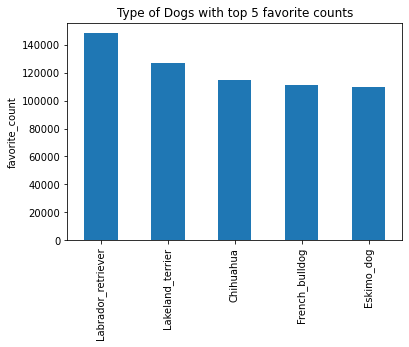

In [85]:
df.favorite_count.sort_values(ascending=False).nlargest(5).plot(kind='bar')
plt.ylabel('favorite_count')
plt.title('Type of Dogs with top 5 favorite counts')
ax = plt.axes()
ax.set_xticks([0, 1, 2,3,4])
ax.set_xticklabels(['Labrador_retriever', 'Lakeland_terrier', 'Chihuahua', 'French_bulldog', 'Eskimo_dog'])

# Question: Which dogs have the highest ratings?


In [86]:
df.groupby('Dog').Numerator.mean().nlargest(10)

Dog
Soft-coated_wheaten_terrier    25.454545
West_highland_white_terrier    15.642857
Great_pyrenees                 14.928571
Borzoi                         14.444444
Labrador_retriever             13.905263
Golden_retriever               13.269784
Siberian_husky                 13.250000
Saluki                         12.500000
Briard                         12.333333
Tibetan_mastiff                12.250000
Name: Numerator, dtype: float64

The above results show the type of dogs with the top 10 ratings

Text(0.5, 1.0, 'Type of Dogs with top 10 ratings')

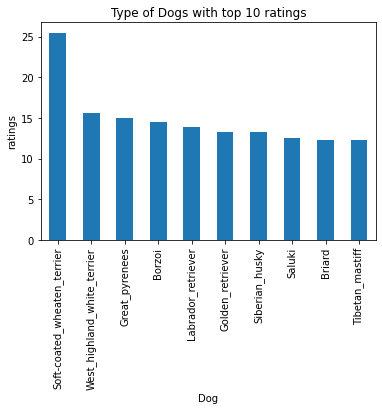

In [87]:
df.groupby('Dog').Numerator.mean().nlargest(10).plot(kind='bar')
plt.ylabel('ratings')
plt.title('Type of Dogs with top 10 ratings')
 